<a href="https://colab.research.google.com/github/Shivachikkonda02/Deep-Learning-Project-With-ANN/blob/main/Churn%20Modelling%20ANN%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import tensorflow as tf

In [59]:
# Importing some libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [60]:
# Load the dataset

dataset=pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [61]:
# Divide the dataset into independent and dependent features

x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [62]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [63]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [70]:
# Feature Engineering

geography=pd.get_dummies(x['Geography'],drop_first=True).astype(int)
gender=pd.get_dummies(x['Gender'],drop_first=True).astype(int)

In [71]:
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [72]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [73]:
x.drop(['Geography','Gender'],axis=1,inplace=True)

In [74]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [77]:
pd.concat([x,geography,gender],axis=1)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [78]:
#Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [80]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

In [82]:
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [83]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [84]:
x_train.shape

(8000, 8)

In [85]:
x_test.shape

(2000, 8)

In [86]:
from tensorflow import keras

In [110]:
classifier=keras.models.Sequential([
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(4,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(3,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid')

])

In [111]:
classifier.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [112]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=10)

Epoch 1/10
536/536 [==============================] - 4s 4ms/step - loss: 0.6355 - accuracy: 0.7848 - val_loss: 0.5880 - val_accuracy: 0.7955
Epoch 2/10
536/536 [==============================] - 2s 3ms/step - loss: 0.5597 - accuracy: 0.7962 - val_loss: 0.5387 - val_accuracy: 0.7955
Epoch 3/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5266 - accuracy: 0.7962 - val_loss: 0.5184 - val_accuracy: 0.7955
Epoch 4/10
536/536 [==============================] - 2s 4ms/step - loss: 0.5131 - accuracy: 0.7962 - val_loss: 0.5102 - val_accuracy: 0.7955
Epoch 5/10
536/536 [==============================] - 2s 3ms/step - loss: 0.5025 - accuracy: 0.7964 - val_loss: 0.4899 - val_accuracy: 0.7955
Epoch 6/10
536/536 [==============================] - 2s 4ms/step - loss: 0.4845 - accuracy: 0.8041 - val_loss: 0.4793 - val_accuracy: 0.7970
Epoch 7/10
536/536 [==============================] - 3s 5ms/step - loss: 0.4788 - accuracy: 0.8085 - val_loss: 0.4740 - val_accuracy: 0.7982
Epoch 

In [113]:
model_history

In [114]:
model_history.history

{'loss': [0.6354665160179138,
  0.5597341656684875,
  0.526565670967102,
  0.513097882270813,
  0.5024895668029785,
  0.4844815135002136,
  0.4788014888763428,
  0.4682382643222809,
  0.46250152587890625,
  0.4550422728061676],
 'accuracy': [0.7848479151725769,
  0.7962306141853333,
  0.7962306141853333,
  0.7962306141853333,
  0.796417236328125,
  0.8040679097175598,
  0.8085463643074036,
  0.8113453984260559,
  0.8163836598396301,
  0.818809449672699],
 'val_loss': [0.5879709720611572,
  0.5386855602264404,
  0.5184104442596436,
  0.5101833343505859,
  0.48985040187835693,
  0.47932305932044983,
  0.47399431467056274,
  0.46752846240997314,
  0.4550434947013855,
  0.44985461235046387],
 'val_accuracy': [0.7955319881439209,
  0.7955319881439209,
  0.7955319881439209,
  0.7955319881439209,
  0.7955319881439209,
  0.7970466017723083,
  0.798182487487793,
  0.7996971011161804,
  0.8137069344520569,
  0.8182506561279297]}

In [115]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

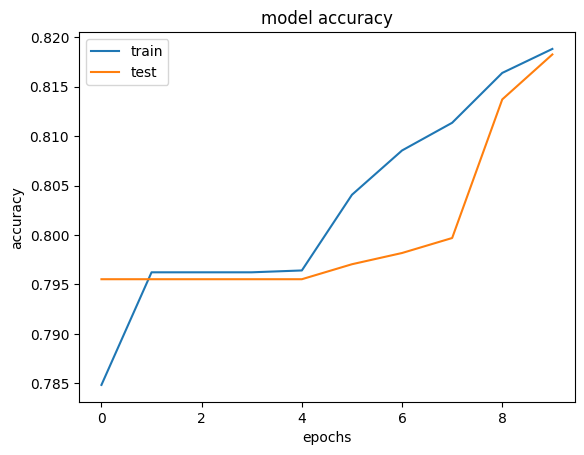

In [116]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(['train','test'],loc='upper left')
plt.show()

In [117]:
# predicting the test set results

y_pred=classifier.predict(x_test)
y_pred=(y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [118]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix

In [119]:
cm=confusion_matrix(y_test,y_pred)

In [120]:
cm

array([[1585,   10],
       [ 352,   53]])

In [121]:
# calculate the accuracy score

from sklearn.metrics import accuracy_score

In [122]:
score=accuracy_score(y_test,y_pred)

In [123]:
score

0.819

In [124]:
# Get the weights
classifier.get_weights()

[array([[ 0.46405357, -0.07301971,  0.14900155, -0.09668902,  0.41397318,
         -0.07279926,  0.42851934,  0.28745273],
        [ 0.7136858 , -0.05127887, -0.737893  ,  0.81838065, -0.26981187,
         -0.08173814,  0.49495867,  0.557252  ],
        [ 0.4142412 ,  0.34770313, -0.2836575 , -0.08583337,  0.17005847,
         -0.29652634,  0.03392895,  0.11464822],
        [ 0.23162374,  0.7674267 , -0.25334597,  0.04141818,  0.7571246 ,
         -0.1190228 , -0.44966578,  0.6241023 ],
        [ 0.13387637,  0.02472859,  0.00772609, -0.41405088, -0.2068392 ,
          0.5663861 , -0.02895504,  0.804588  ],
        [-0.21045302, -0.5128005 ,  0.45376268, -0.04171158,  0.5499949 ,
          0.03322048, -0.08431674,  0.23825368],
        [ 0.27133042,  0.21601143, -0.47456917, -0.8019412 ,  0.5904913 ,
         -0.01907511,  0.3247437 , -0.5898563 ],
        [ 0.16264452, -0.094629  ,  0.08539294,  0.2797343 ,  0.07402031,
          0.13252658, -0.06438601, -0.30920446]], dtype=float32),